In [1]:
#Import the libraries
import os
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import load_boston,load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns
sns.set(color_codes=True)

#Load the data
boston = load_boston()


#Find the dic keys
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [67]:
#find features name
columns = boston.feature_names
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [68]:
#Create dataframe
boston_data = pd.DataFrame(boston.data)
boston_data.columns = columns
print(boston_data.shape)
boston_data['TARGET'] = boston.target
boston_data

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


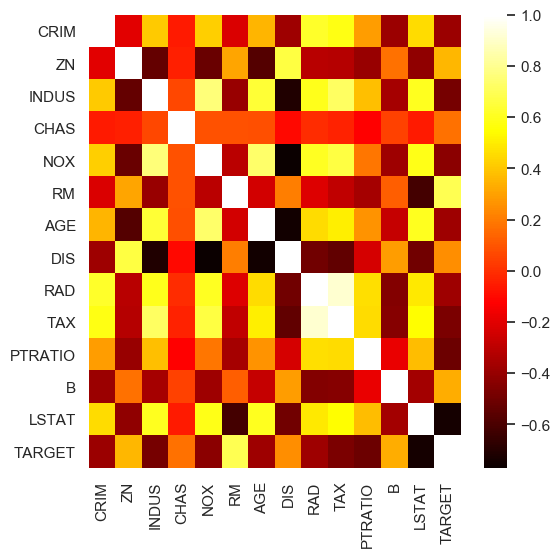

In [69]:
plt.figure(figsize= (6,6), dpi=100)
sns.heatmap(boston_data.corr(),cmap='hot')

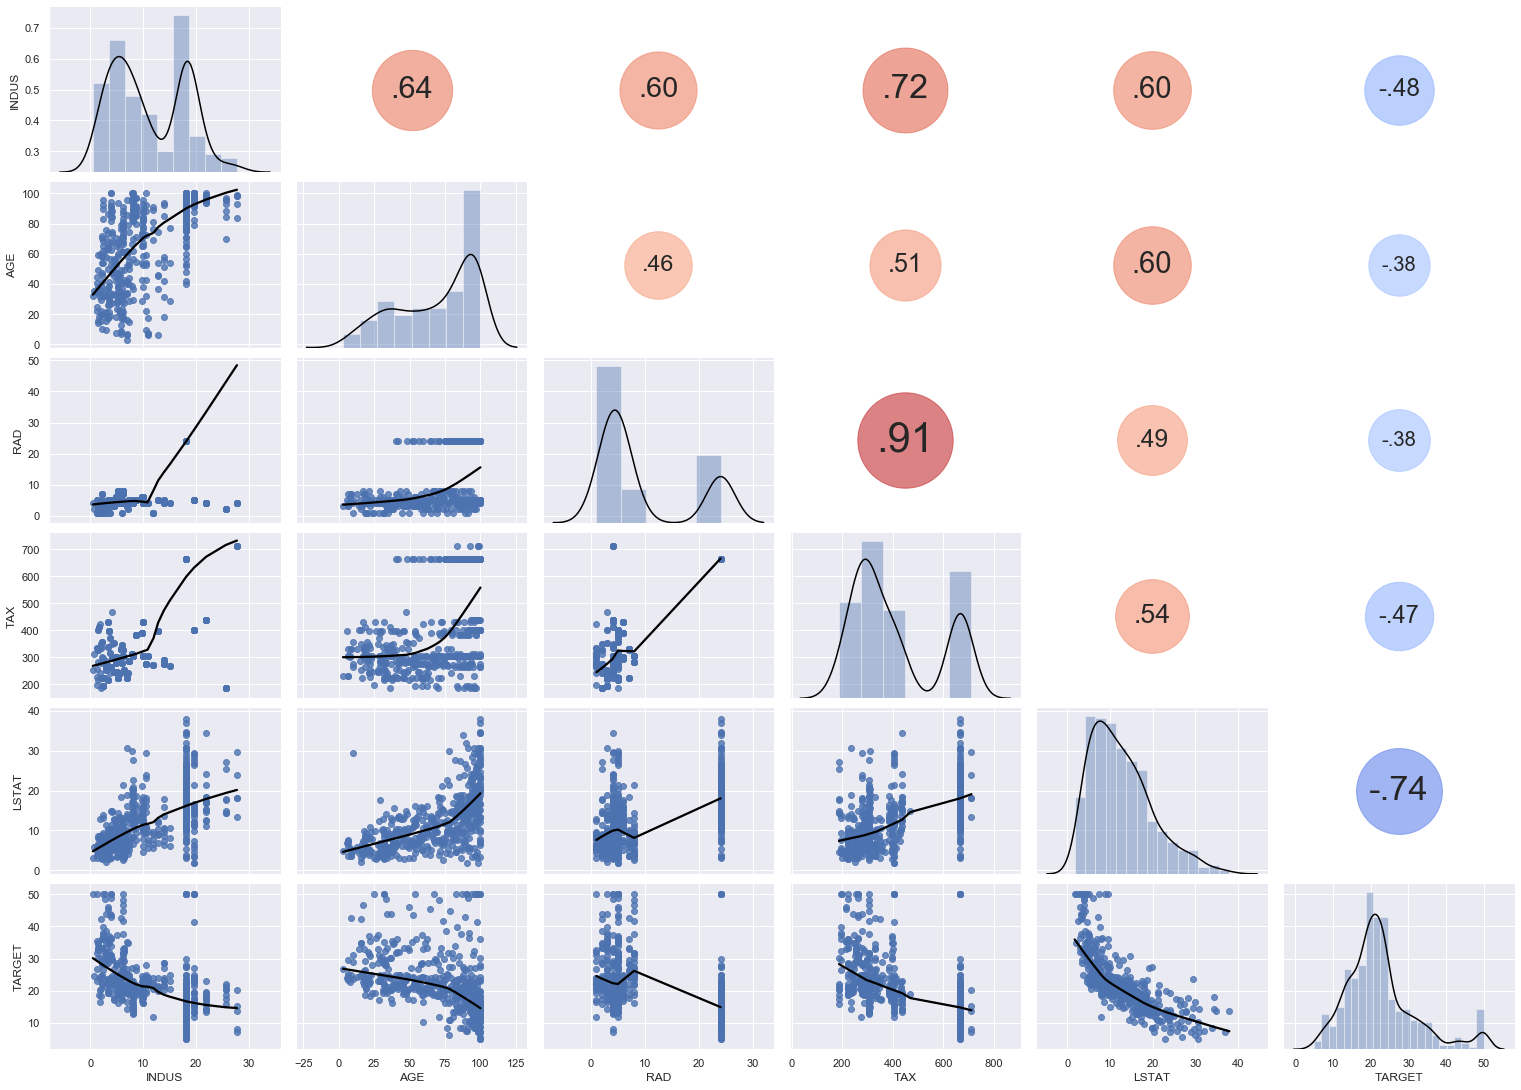

In [70]:
# Just to search for nice variables with good correlation and outliers.
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

g = sns.PairGrid(boston_data[['INDUS','AGE','RAD','TAX','LSTAT','TARGET']], aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=True, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

In [71]:
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [85]:
x='TAX'
y='INDUS'
k = 2 # Change threshold constant (2, 2.5, 3)
boston_df = boston_data[[x,y]].drop_duplicates()
boston_df

,TAX,INDUS
0,296.0,2.31
1,242.0,7.07
3,222.0,2.18
6,311.0,7.87
13,307.0,8.14
...,...,...
354,334.0,1.91
356,666.0,18.10
488,711.0,27.74
493,391.0,9.69


In [86]:
# # Another test dataset
# a= [[ 12,   7,   9],
#  [  9,  16,   7],
#  [ 14,  11,  10],
#  [ 14,   5,   5],
#  [ 12,   8,   7],
#  [  8,   8,  10],
#  [  9,  14,   8],
#  [ 12,  12,  10],
#  [ 18,  10,   6],
#  [  6,  12,  11],
#  [  4,  12,  15],
#  [  5,  13,  10],
#  [  8,   9,   8],
#  [106, 116,  97],
#  [ 90, 116, 114]]
# z='THIRD'
# boston_df = pd.DataFrame(a,columns=[x,y,z])
# boston_df

In [87]:
boston_df.corr()

,TAX,INDUS
TAX,1.000000,0.426369
INDUS,0.426369,1.000000


Text(0, 0.5, 'INDUS')

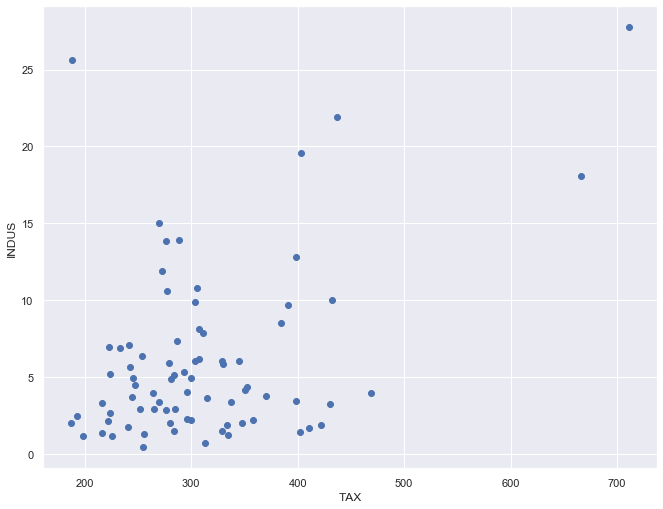

In [88]:
#Multivariate outlier analysis
fig, ax = plt.subplots(figsize=(11,8.5))
ax.scatter(boston_df[x], boston_df[y])
ax.set_xlabel(x)
ax.set_ylabel(y)

Text(0.5, 1.0, 'PCA Graph- One Component')

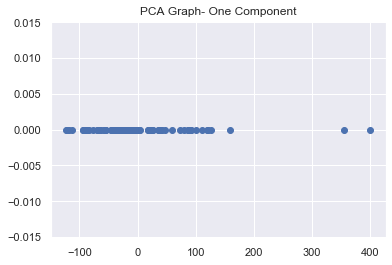

In [89]:
# One component PCA
pca = PCA(n_components=1, svd_solver= 'full')
tst = pca.fit_transform(boston_df)
plt.scatter(tst,[0]*len(tst))
ax.set_xlabel(x)
ax.set_ylabel(y)
plt.title('PCA Graph- One Component')


Text(0.5, 1.0, 'PCA Graph- Without Dimension Reduction')

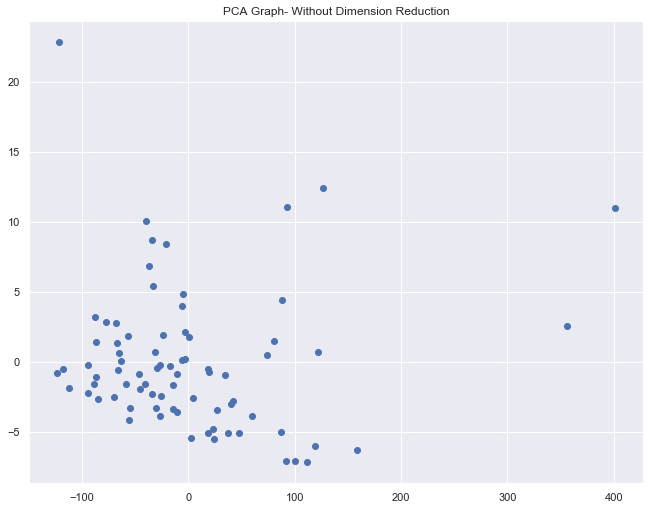

In [90]:
# Calculate PCA graph
pca = PCA(n_components=boston_df.shape[1], svd_solver= 'full')
df = pd.DataFrame(pca.fit_transform(boston_df),index=boston_df.index,columns=boston_df.columns) #[i.lower()+'_pca' for i in boston_df.columns]
plt.figure(figsize=(11,8.5))
plt.scatter(x=df[x],y=df[y])
ax.set_xlabel(x)
ax.set_ylabel(y)
plt.title('PCA Graph- Without Dimension Reduction')

In [91]:
# https://www.youtube.com/watch?v=spNpfmWZBmg&t=0s
def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    diff = data - mean_distr
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_cov_matrix).dot(diff[i])))
    return np.array(md)

# Check that matrix is positive definite
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

In [92]:
# Calculate covariance and its inverse matrices
cov_matrix = np.cov(df.values,rowvar=False)
inv_cov = np.linalg.inv(cov_matrix)
mean = df.values.mean(axis=0)

# Check matrices are positive definite: https://en.wikipedia.org/wiki/Definiteness_of_a_matrix 
assert is_pos_def(cov_matrix) and is_pos_def(inv_cov)
# Check matrices are invereses
np.matmul(cov_matrix,inv_cov).astype(np.float16)

array([[1., 0.],
       [0., 1.]], dtype=float16)

Threshold: 2.1933847527024017


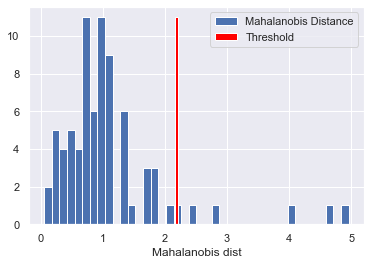

In [93]:
md = MahalanobisDist(inv_cov, mean, df.values, verbose=False)
threshold = np.mean(md) * k
print("Threshold: "+ str(threshold))

plt.hist(list(md),bins=40,label="Mahalanobis Distance")
plt.bar(threshold,max(np.histogram(md,bins=40)[0]),width=0.05,color='red',label='Threshold')
plt.xlabel('Mahalanobis dist')
plt.legend()
plt.show()

In [94]:
# Check if data is normally distributed:
# [P(df is N),  p-value] 
# The first paramater should approach 1. A good threshold is 0.95.
print(stats.shapiro(df[x]))
print(stats.shapiro(df[y]))

# stats.chisquare(md) # https://en.wikipedia.org/wiki/Chi-squared_test

(0.8388399481773376, 1.0710994047258282e-07)
(0.8728927373886108, 1.5238501873682253e-06)


(0.0, 15)

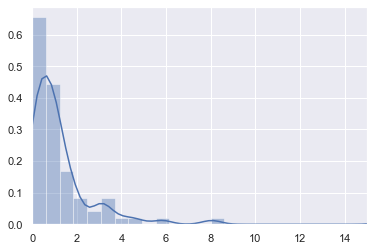

In [95]:
# The squared Mahalanobis distance should follow a X^2 (Chi Squared) distribution if the variables normally distributed.
plt.figure()
sns.distplot(np.square(md), bins = 40, kde= True)
plt.xlim([0.0,15])

In [96]:
# classify what data is an outlier  
# boston_df['anomaly'] = df['anomaly'] = md>threshold
# boston_df[boston_df.anomaly]
(boston_df[md>threshold])


,TAX,INDUS
120,188.0,25.65
127,437.0,21.89
142,403.0,19.58
356,666.0,18.10
488,711.0,27.74


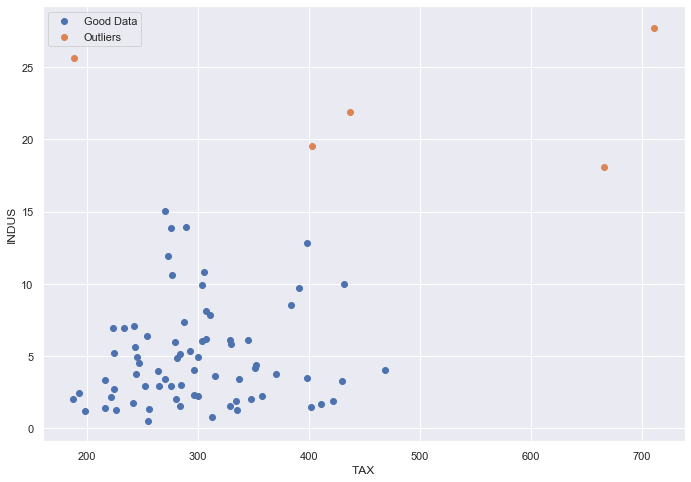

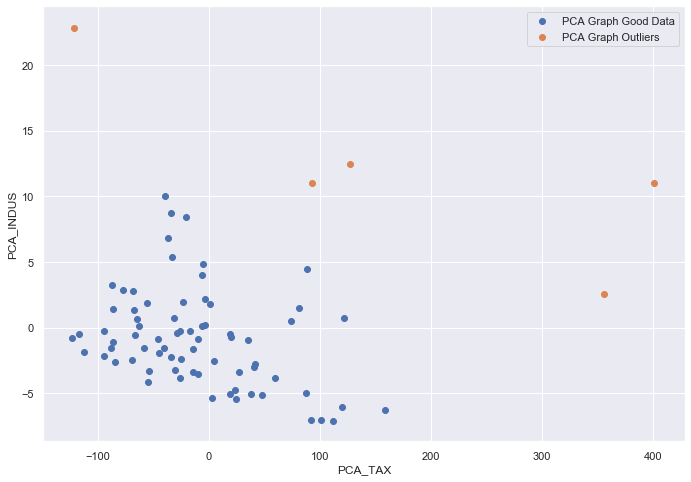

In [97]:
# Visualize outliers results
plt.figure(figsize=(11.5,8))
plt.scatter(boston_df[x][md<=threshold], boston_df[y][md<=threshold],label='Good Data')
plt.scatter(boston_df[x][md>threshold], boston_df[y][md>threshold], label= 'Outliers')
plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.show()

plt.figure(figsize=(11.5,8))
plt.scatter(df[x][md<=threshold], df[y][md<=threshold],label='PCA Graph Good Data')
plt.scatter(df[x][md>threshold], df[y][md>threshold], label= 'PCA Graph Outliers')
plt.xlabel('PCA_'+x)
plt.ylabel('PCA_'+y)
plt.legend()
# plt.plot([threshold]*len(df[x]_pca),df.indus_pca,colour)